# Apprentissage Supervisé
<font color=red>
- Bastien Bigué <br> 
- Thibaut Sarion
</font>

#### Comment utiliser
Nous vous invitons à éxecuter le premier script Python, qui est un script d'importation des différents modules utilisés au cours de ce Notebook <br>
Il configure également un bouton, permettant de cacher/afficher le code du notebook
#### Plan
     - Lab 1 : K-Nearest Neighbours 
     - Lab 2 : Apprentissage par perceptron multi-couche 
     - Lab 3 : Machines à vecteurs de support 
     - Bilan : étude comparative des 3 différents modèles



- Importation des modules génériques utilisés

In [1]:
from sklearn.model_selection import train_test_split
import numpy as npy
import time # Pour mesurer les performances des classificateurs
import matplotlib.pyplot as plt # plotting result
plt.style.use('ggplot')

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Cliquez ici pour voir/cacher le code"></form>''')

### Fetching data from MNIST

Pour tous les tests qui suivent, nous utiliserons les mêmes données pour l'entrainement ainsi que le scoring de manière à ne pas biaiser nos résultats

In [7]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist=fetch_mldata('MNIST original',data_home=".")
sampleIndex=npy.random.randint(70000,size=5000)
baseData=mnist.data[sampleIndex]
baseTarget=mnist.target[sampleIndex]
dataTrain,dataTest,targetTrain,targetTest=train_test_split(baseData,baseTarget,train_size=0.7)

print("taille dataTrain ",len(dataTrain))
print("taille dataTest",len(dataTest))

taille dataTrain  3500
taille dataTest 1500


/home/chivunito/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Fetching Data from pima.csv 

## <font color=red> Lab 1 : K-Nearest Neighbours </font>

## <font color=red> Lab 2 : Apprentissage par perceptron multi-couche </font>


### 1 - Instantiation d'un classifieur MLP <br>
see http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(50))
startTime=time.time()
clf.fit(dataTrain,targetTrain)
predictedTarget=clf.predict(dataTest)

#### Scoring : 
- Nous pouvons en déduire que le classifieur utilise le mode 'micro' pour scorer son modèle

In [8]:
from sklearn.metrics import precision_score

# With score
score=clf.score(dataTest,targetTest)
print("Scoring du classifieur",score)

# With metrics.precision_score
for average in ['micro','macro','weighted']:
    score=precision_score(targetTest,predictedTarget,average=average)
    print("Mode",average,"score : ",score)

Scoring du classifieur 0.872666666667
Mode micro score :  0.872666666667
Mode macro score :  0.869817431449
Mode weighted score :  0.873131459114


### 2 - Variation du nombre de neuronnes sur la 1°couche

In [ ]:
# Methode générique appelée plusieurs fois pour scorer le modèle MLP : return Summary : {}
def mlp(layers,activation='relu',solver='lbfgs', alpha=1e-4) :
    summary={}
    summary['layers']=layers
    startTime=time.time()
    clf = MLPClassifier(activation=activation,solver=solver, alpha=alpha,hidden_layer_sizes=layers)
    clf.fit(dataTrain,targetTrain)
    score=clf.score(dataTest,targetTest)
    summary['runningTime']=time.time()-startTime
    summary['score']=score
#     print("layers",layers,"score",score,"time",summary['runningTime'])
    return summary

In [112]:
summaryList=[]
for nbNeurone in range(2,103,10) :
    summary=mlp(layers=[nbNeurone])
    summaryList.append(summary)

#### Plotting Result

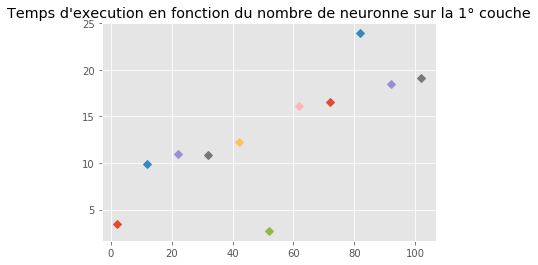

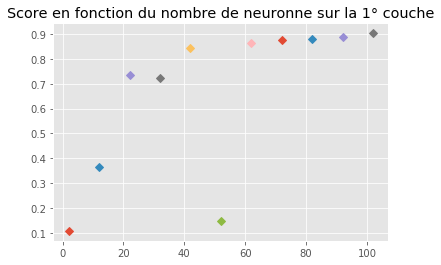

In [113]:
# Running time
for summary in summaryList : 
    plt.plot(summary['layers'],summary['runningTime'],marker="D")
plt.title("Temps d'execution en fonction du nombre de neuronne sur la 1° couche")
plt.show()

# Score 
for summary in summaryList : 
    plt.plot(summary['layers'],summary['score'],marker="D")
plt.title("Score en fonction du nombre de neuronne sur la 1° couche")
plt.show()

### 3 - Variation du nombre de Couches 
- Afin de conserver une certaine consistance de nos résultats et ne pas être influencé par une génération du nombre aléatoire de nos neurones, nous fixerons le même nombre de neurones sur toutes les couches

In [46]:
summaryMLP=[]

for numCouche in range(1,9,2):
    for nbNeurone in range(20,100,20):
        layers=[nbNeurone for x in range(numCouche)]
        summaryMLP.append(mlp(layers))
        

nbNeurone 20 score 0.564 time 11.932010889053345
nbNeurone 40 score 0.848666666667 time 13.301393270492554
nbNeurone 60 score 0.873333333333 time 19.533451795578003
nbNeurone 80 score 0.894 time 20.886394739151
nbNeurone 20 score 0.678 time 11.13599443435669
nbNeurone 40 score 0.878666666667 time 16.288554668426514
nbNeurone 60 score 0.902 time 13.48581051826477
nbNeurone 80 score 0.902 time 7.38475775718689
nbNeurone 20 score 0.840666666667 time 11.671825647354126
nbNeurone 40 score 0.905333333333 time 11.186224460601807
nbNeurone 60 score 0.898666666667 time 12.676023721694946
nbNeurone 80 score 0.906 time 9.343704462051392
nbNeurone 20 score 0.836 time 18.05611562728882
nbNeurone 40 score 0.872 time 19.443366289138794
nbNeurone 60 score 0.914666666667 time 13.96289324760437
nbNeurone 80 score 0.918 time 16.854049682617188


#### Plotting  result

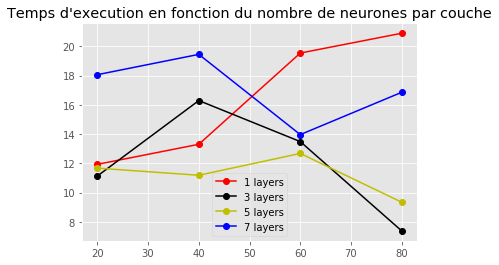

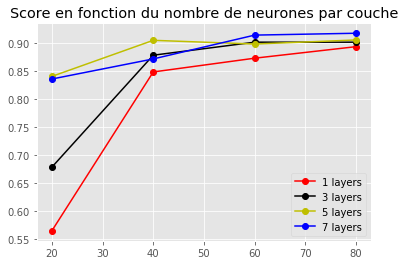

In [114]:
from mpl_toolkits.mplot3d import axes3d

layersList,runningTimeList,scoreList=[],[],[]
for summary in summaryMLP:
    layersList.append(summary['layers'])
    runningTimeList.append(summary['runningTime'])
    scoreList.append(summary['score'])
#     print(summary)

nbLayer=npy.array([len(x) for x in layersList])
nbNeurone=npy.array([x[0] for x in layersList])
runningTimeList=npy.array(runningTimeList)
scoreList=npy.array(scoreList)

# Running time
for numCouche,color in zip(range(1,9,2),['r','k','y','b','g']):
    which=nbLayer==numCouche
    plt.plot(nbNeurone[which],runningTimeList[which],color=color,label=str(numCouche)+' layers',marker="o")
plt.title("Temps d'execution en fonction du nombre de neurones par couche")
plt.legend()
plt.show()

# Scoring
for numCouche,color in zip(range(1,9,2),['r','k','y','b','g']):
    which=nbLayer==numCouche
    plt.plot(nbNeurone[which],scoreList[which],color=color,label=str(numCouche)+' layers',marker="o")
plt.title("Score en fonction du nombre de neurones par couche")
plt.legend()
plt.show()


### 4 - Convergence des algorithmes d'optimisation 
- nous fixerons le nombre de layer à 5 et le nombre de neurones à 40 ( en raison des résultats précédents ) 

In [115]:
bestLayers=[40,40,40,40,40]

solverList=['lbfgs', 'sgd', 'adam']
summaryMLP_algo=[]
for solver in solverList :
    summary=mlp(layers=bestLayers,solver=solver)
    summary['solver']=solver
    summaryMLP_algo.append(summary)

#### Plotting solver comparison

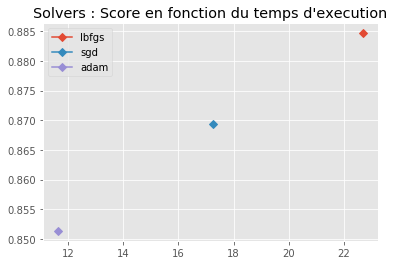

In [116]:
for summary in summaryMLP_algo : 
    plt.plot(summary['runningTime'],summary['score'],marker="D",label=summary['solver'])
plt.title("Solvers : Score en fonction du temps d'execution")
plt.legend()
plt.show()



### 5 - Fonction d'activation

In [117]:
bestLayers=[40,40,40,40,40]
activationList=['identity', 'logistic', 'tanh', 'relu']
summaryMLP_activation=[]
for activation in activationList :
    summary=mlp(layers=bestLayers,activation=fonction)
    summary['activation']=activation
    summaryMLP_activation.append(summary)

#### plotting results

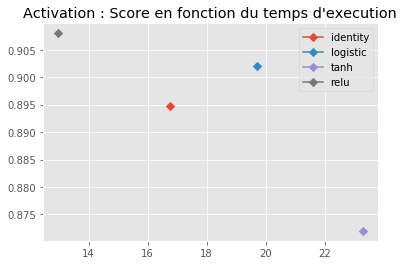

In [119]:
for summary in summaryMLP_activation : 
    plt.plot(summary['runningTime'],summary['score'],marker="D",label=summary['activation'])
plt.title("Activation : Score en fonction du temps d'execution")
plt.legend()
plt.show()


### 6 - Paramètre alpha : Régularisation

In [120]:
bestLayers=[40,40,40,40,40]
alphaList=[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
summaryMLP_alpha=[]
for alpha in alphaList :
    summary=mlp(layers=bestLayers,alpha=alpha)
    summary['alpha']=alpha
    summaryMLP_alpha.append(summary)

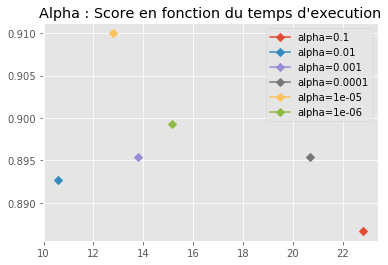

In [121]:
for summary in summaryMLP_alpha : 
    plt.plot(summary['runningTime'],summary['score'],marker="D",label="alpha="+str(summary['alpha']))
plt.legend()
plt.title("Alpha : Score en fonction du temps d'execution")
plt.show()

### 7 - Bilan sur MLP
__ D'après nos précédents tests, nous pouvons choisir le modèle suivant : __
- __Layer=[40,40,40,40,40]__ car il a l'avantage de réduire le temps d'execution tout en maximisant le score du classifieur
- __alpha=0.001__ pour son gain en rapidité

A COMPLETER AVEC LES RESULTATS DU GRAND TEST

## <font color=red> Lab 3 : Machines à vecteurs de support </font>
## Support Vector Classifier
see http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#### Instanciation
 

In [2]:
import pandas
pima = pandas.read_table("pima.csv",sep=",",header=0)
pima.target=pima['class']
del pima['class']
pima.data=pima

dataTrain,dataTest,targetTrain,targetTest=train_test_split(pima.data,pima.target,train_size=0.7)

/home/chivunito/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
import sklearn.svm as svm
def svc(C=1,kernel="linear",gamma='auto'):
    summary={}
    summary['kernel']=kernel
    summary['gamma']=gamma
    summary['C']=C
    startTime=time.time()
    classifier=svm.SVC(kernel=kernel,C=C,gamma=gamma)
    classifier.fit(dataTrain,targetTrain)
    runningTime=time.time()-startTime
    summary['runningTime']= runningTime
    summary['score']=classifier.score(dataTest,targetTest)
    return summary

In [5]:
summary=svc()
print(summary)

{'kernel': 'linear', 'gamma': 'auto', 'C': 1, 'runningTime': 3.3133418560028076, 'score': 0.68831168831168832}


### 1 - Variation du kernel 

In [6]:
import time
kernelModeList=['linear','rbf','sigmoid']

summaryListSVC_kernel=[]
for kernel in kernelModeList : 
    summary=svc(kernel=kernel)
    print(summary)
    summaryListSVC_kernel.append(summary)

{'kernel': 'linear', 'gamma': 'auto', 'C': 1, 'runningTime': 3.033262252807617, 'score': 0.68831168831168832}
{'kernel': 'rbf', 'gamma': 'auto', 'C': 1, 'runningTime': 0.04234170913696289, 'score': 0.61038961038961037}
{'kernel': 'sigmoid', 'gamma': 'auto', 'C': 1, 'runningTime': 0.0048596858978271484, 'score': 0.61038961038961037}


#### Plotting result for Kernel variation

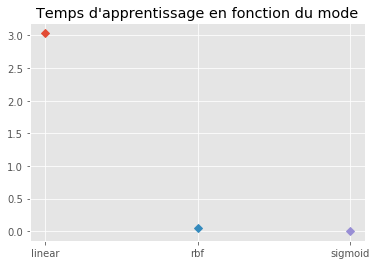

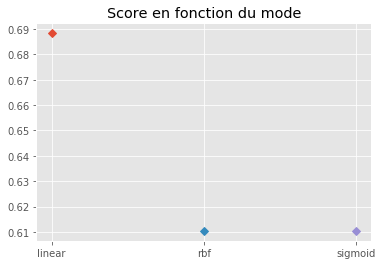

In [7]:
for dico,index in zip(summaryListSVC_kernel,range(4)) :
    plt.plot(index,dico['runningTime'],marker="D")
    
plt.xticks([0,1,2], kernelModeList)
plt.title("Temps d'apprentissage en fonction du mode")
plt.show()

for dico,index in zip(summaryListSVC_kernel,range(4)) :
#     print(dico,index)
    plt.plot(index,dico['score'],marker="D")
    
plt.xticks([0,1,2], kernelModeList)
plt.title("Score en fonction du mode")
plt.show()



- Le mode __poly__ ne converge pas
- le mode __linear__ a le meilleur score, mais est plus lent que les autres

## Variation du paramètre de tolérance aux erreurs C

In [5]:
summaryListSVC_c=[]
for mode in ['linear','rbf','sigmoid']: 
    for cValue in npy.linspace(0.01,2,9):
        summary=svc(kernel=mode,C=cValue)
        summaryListSVC_c.append(summary)

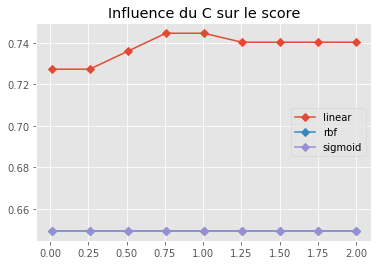

In [6]:
import matplotlib.pyplot as plt

for mode in ['linear','rbf','sigmoid']: 
    result=npy.array([(dico['C'],dico['score']) for dico in summaryListSVC_c if dico['kernel']==mode])
    plt.plot(result[:,0],result[:,1],marker="D",label=mode)
    
plt.title("Influence du C sur le score")
plt.legend()
plt.show()

La variation du paramètre __C__ n'a aucune influence sur les scores des modèles pour rbf et sigmoid
<br>En revanche, pour le kernel linear, on observe une légère amélioration pour __C__=1

### Variation du paramètre Gamma

In [15]:
summaryListSVC_gamma=[]
for mode in ["linear",'rbf','sigmoid']: 
    for gamma in npy.logspace(base=10,start=-3,stop=-6,num=20):
        summary=svc(kernel=mode,gamma=gamma)
        summaryListSVC_gamma.append(summary)

Mode linear : gamma optimal =  0.001  pour un score de  0.744588744589
Mode rbf : gamma optimal =  3.79269019073e-05  pour un score de  0.770562770563
Mode sigmoid : gamma optimal =  1.2742749857e-05  pour un score de  0.731601731602


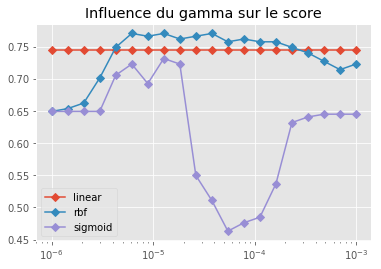

In [16]:
import matplotlib.pyplot as plt

for mode in ["linear",'rbf','sigmoid']: 
    result=npy.array([(dico['gamma'],dico['score']) for dico in summaryListSVC_gamma if dico['kernel']==mode])
    plt.semilogx(result[:,0],result[:,1],marker="D",label=mode)
    best=max(result,key=lambda x : x[1])
    print('Mode',mode,": gamma optimal = ",best[0]," pour un score de ",best[1])
plt.title("Influence du gamma sur le score")
plt.legend()
plt.show()



## GridSearchCV


In [4]:
from sklearn.model_selection import GridSearchCV

gammaList=npy.logspace(base=10,start=-3,stop=-6,num=10)
param_grid = [
  {'C':npy.linspace(0.01,2,9),'gamma': gammaList, 'kernel': ['rbf','sigmoid']},
 ]

grid = GridSearchCV(svm.SVC(),param_grid, cv=5)
gridResult=grid.fit(dataTrain, targetTrain)
print('Les meilleurs paramètres sont',gridResult.best_params_)
print('Le score associé est ',gridResult.best_score_)


Les meilleurs paramètres sont {'C': 1.2537499999999999, 'gamma': 2.1544346900318867e-05, 'kernel': 'rbf'}
Le score associé est  0.769087523277


Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.49  0.51]]


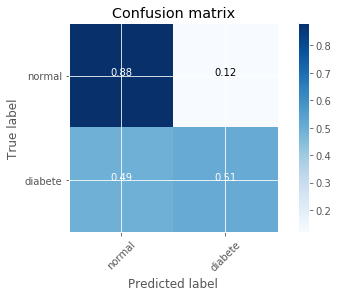

In [12]:
from sklearn.metrics import confusion_matrix 
import confMatrixPlot

bestParams=gridResult.best_params_
classifier=svm.SVC(**bestParams)
classifier.fit(dataTrain,targetTrain)
predictedData=classifier.predict(dataTest)
matrice=confusion_matrix(targetTest,predictedData)
# confMatrixPlot.plot_confusion_matrix(matrice,['normal','diabete'])
confMatrixPlot.plot_confusion_matrix(matrice,['normal','diabete'],normalize=True)
npy.set_printoptions(precision=2)
plt.show()


Cette matrice de confusion est très intérassante, en effet elle nous donne beaucoup d'informations : <br>
-  __Taux de vrai négatif__ à 0.88, cela veut dire que quand notre classifieur prédit que la patient n'a pas le diabète, alors il dit juste 88% des fois
- __Faux Négatif__ à 0.12% : Patient malade mais le test est négatif
- En revanche, lorsque le classifieur classe un patient comme malade, pratiquemment une fois sur deux, il se trompe